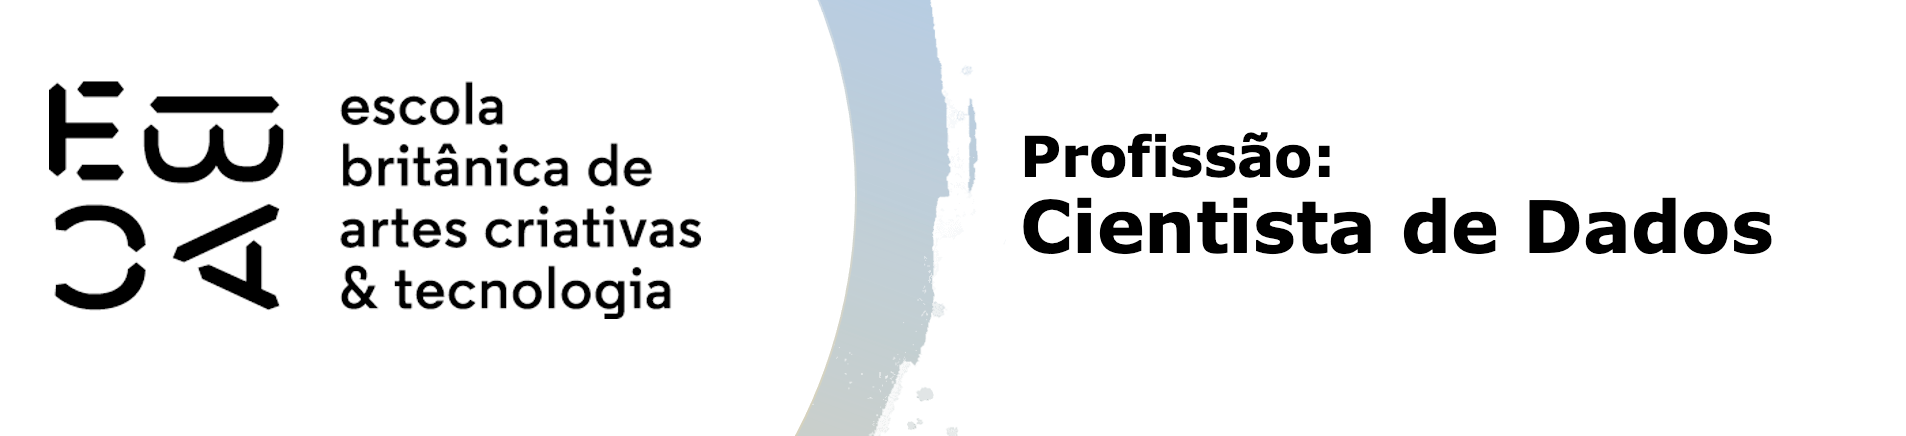

# Regressão III - Tarefa

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('./previsao_de_renda_II.csv', index_col=0)
df.head(20)

,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
data_ref,,,,,,,,,,,,,
2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78
2015-01-01,11433,M,S,S,0,Pensionista,Superior completo,Casado,Casa,56,NaN,2.0,1847.48
2015-01-01,9928,F,S,S,0,Assalariado,Superior completo,Casado,Casa,41,19.438356,2.0,14162.81
2015-01-01,5073,F,S,S,0,Servidor público,Médio,Casado,Casa,52,7.134247,2.0,1981.07
2015-01-01,14570,F,S,S,0,Pensionista,Superior completo,Solteiro,Casa,50,NaN,1.0,7806.22


## Avalie valores missing e substitua pela média

Neste exercício não vamos nos preocupar com valores *missing*. Substitua-os pela média.

In [3]:
#identificando valores ausentes
df.isnull().sum()

index                         0
sexo                          0
posse_de_veiculo              0
posse_de_imovel               0
qtd_filhos                    0
tipo_renda                    0
educacao                      0
estado_civil                  0
tipo_residencia               0
idade                         0
tempo_emprego            125760
qt_pessoas_residencia         0
renda                         0
dtype: int64

In [4]:
#Calculando a média de tempo de emprego
med_temp = df['tempo_emprego'].mean()

#Fazendo a substituição dos valores ausentes pela média
df['tempo_emprego'].fillna(med_temp, inplace=True)

#retirando a coluna index
df.drop(['index'], axis=1, inplace=True)

#Verificando valores ausentes
df.isnull().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64

### Base de testes

Separe os três últimos meses como base *holdout* (base de teste).

In [5]:
#Transformando o índice em data
df.index

Index(['2015-01-01', '2015-01-01', '2015-01-01', '2015-01-01', '2015-01-01',
       '2015-01-01', '2015-01-01', '2015-01-01', '2015-01-01', '2015-01-01',
       ...
       '2016-03-01', '2016-03-01', '2016-03-01', '2016-03-01', '2016-03-01',
       '2016-03-01', '2016-03-01', '2016-03-01', '2016-03-01', '2016-03-01'],
      dtype='object', name='data_ref', length=750000)

In [6]:
#Transformando o índice em data
df.index = pd.to_datetime(df.index)
#Verificando a data máxima
df.index.max()

Timestamp('2016-03-01 00:00:00')

In [7]:
df.index

DatetimeIndex(['2015-01-01', '2015-01-01', '2015-01-01', '2015-01-01',
               '2015-01-01', '2015-01-01', '2015-01-01', '2015-01-01',
               '2015-01-01', '2015-01-01',
               ...
               '2016-03-01', '2016-03-01', '2016-03-01', '2016-03-01',
               '2016-03-01', '2016-03-01', '2016-03-01', '2016-03-01',
               '2016-03-01', '2016-03-01'],
              dtype='datetime64[ns]', name='data_ref', length=750000, freq=None)

In [8]:
# importa datetime64
from numpy import datetime64

# cria uma máscara booleana para selecionar linhas com data maior ou igual a 2016-01-01 (tres ultimos meses)
filtro_teste = df.index >= datetime64('2016-01-01')

# aplica a máscara para selecionar as linhas do dataframe e criar dataframe de teste
df_teste = df.loc[filtro_teste].copy()

#criar mascara booleana para selecionar linhas com data menor ou igual a 2016-01-01 (tres primeiros meses)
filtro_treino = df.index < datetime64('2016-01-01')

df_treino = df.loc[filtro_treino].copy()

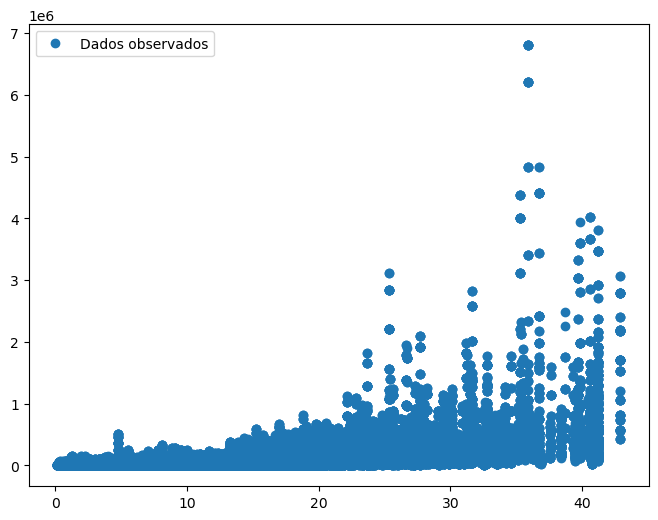

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(df_treino.tempo_emprego,
        df_treino.renda,
        "o",
        label="Dados observados",
        alpha=1)
ax.legend()

### Primeiro modelo
 Não use *index* e não use a data. Avalie o modelo com o $R^2-ajustado$

In [24]:
res = smf.ols('renda ~ tempo_emprego', data=df_treino).fit()

print(f'R-quadrado: {res.rsquared:.2%}')

res.summary()

R-quadrado: 23.58%


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                 1.851e+05
Date:                Wed, 03 May 2023   Prob (F-statistic):               0.00
Time:                        13:38:15   Log-Likelihood:            -7.6780e+06
No. Observations:              600000   AIC:                         1.536e+07
Df Residuals:                  599998   BIC:                         1.536e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.356e+04    182.314   -184.055      0.000   -3.39e+04   -3.32e+04
tempo_emprego  7957.6772     18.494    430.278      0.000    7921.429    7993.925
==============================================================================
Omnibus:                  1425439.625   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      28550038647.681
Skew:                          24.009   Prob(JB):                         0.00
Kurtosis:                    1070.565   Cond. No.                         16.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Análise de perfil

Categorize a variável ```tempo_emprego``` em 20 quantis (cada categoria deve ter aproximadamente a mesma quantidade de observações) e faça uma tabela de perfil (armazene como dataframe) para esta categorização:

- Cada linha é uma categoria
- Uma coluna para a quantidade de observações de cada categoria
- Uma coluna para a média do log-renda para cada categoria
- Uma coluna para a média do tempo de emprego para cada categoria

Faça um gráfico da média do tempo de emprego pela média do log-renda. Insira uma célula de texto e comente se te parece que alguma das transformações vistas no módulo deve fornecer bons resultados.

In [12]:
#Separando as categorias e quebras
tempo_emprego_cat, quebras = pd.qcut(df_treino.tempo_emprego,
                                     20,
                                     duplicates='drop',
                                     retbins=True)
#criar dataframe de perfil
df_perfil = df_treino.copy()

#cria uma nova coluna contendo as categorias de tempo de emprego
df_perfil['tempo_emprego_cat'] = tempo_emprego_cat

# cria uma nova coluna contendo o número de observações para cada categoria
df_perfil['num_obs'] = df_perfil.groupby(
    'tempo_emprego_cat')['tempo_emprego_cat'].transform('count')

# cria uma nova coluna contendo o log de renda para cada categoria
df_perfil['log_renda'] = np.log(df_perfil['renda'])

# cria uma nova coluna contendo a média de tempo de emprego para cada categoria
df_perfil['media_tempo_emprego'] = df_perfil.groupby(
    'tempo_emprego_cat')['tempo_emprego'].transform('mean')

In [13]:
df_perfil.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,tempo_emprego_cat,num_obs,log_renda,media_tempo_emprego
data_ref,,,,,,,,,,,,,,,,
2015-01-01,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14,"(15.214, 20.216]",29999,9.318131,17.538365
2015-01-01,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81,"(9.082, 10.436]",30005,7.793508,9.741024
2015-01-01,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66,"(8.107, 9.082]",29740,9.528769,8.572256
2015-01-01,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84,"(0.816, 1.458]",30031,7.767196,1.125014
2015-01-01,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78,"(0.816, 1.458]",30031,6.673020,1.125014


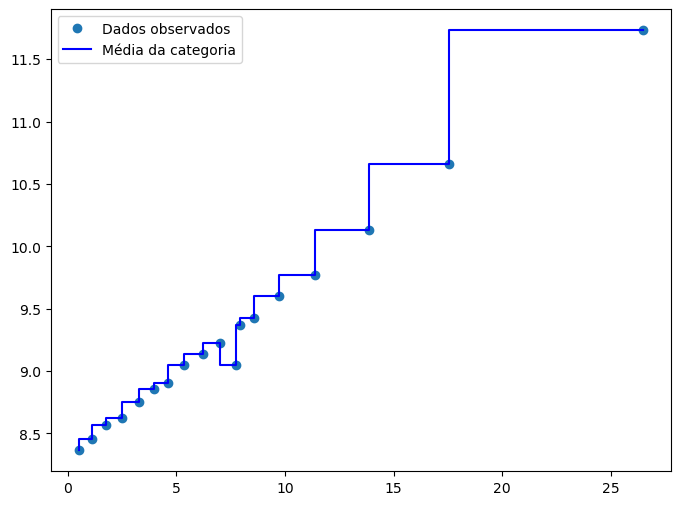

In [14]:
fig, ax = plt.subplots(figsize=(8, 6))
tab = pd.DataFrame()
tab['media_tempo_emprego'] = df_perfil.groupby(
    tempo_emprego_cat)['media_tempo_emprego'].mean()

tab['log_renda'] = df_perfil.groupby(tempo_emprego_cat)['log_renda'].mean()

ax.plot(tab.media_tempo_emprego,
        tab.log_renda,
        "o",
        label="Dados observados",
        alpha=1)
ax.step(tab.media_tempo_emprego,
        tab.log_renda,
        "b-",
        label="Média da categoria",
        alpha=1)
ax.legend()

In [15]:
tab

,media_tempo_emprego,log_renda
tempo_emprego,,
"(0.11699999999999999, 0.816]",0.515042,8.364965
"(0.816, 1.458]",1.125014,8.454323
"(1.458, 2.096]",1.781261,8.569544
"(2.096, 2.912]",2.510920,8.624148
"(2.912, 3.636]",3.301180,8.755365
"(3.636, 4.299]",3.987156,8.855078
"(4.299, 4.934]",4.610421,8.903273
"(4.934, 5.759]",5.367829,9.049495
"(5.759, 6.622]",6.205546,9.139216


Apenas com a categorização da variável ```tempo_emprego``` podemos avaliar que os resultados já apresentam uma linearidade boa com relação ao ```log da renda```.

### Linearização

Experimente pelo menos duas técnicas de linearização vistas ao longo do módulo para melhorar o ajuste da variável ```tempo_emprego```. Compare o $R^2-ajustado$ e avalie se alguma delas apresentou resultados relevantes com relação ao primeiro modelo.


In [26]:
quebras2 = [-np.inf, 6., 12., 20., 43.]

df_perfil['tempo_emprego_cat'] = pd.cut(df_perfil['tempo_emprego'], quebras2)

# Categorização
res_cat = smf.ols('log_renda ~ tempo_emprego_cat', data=df_perfil).fit()
print(f'R-quadrado: {res_cat.rsquared:.2%}')

res_cat.summary()

R-quadrado: 37.53%


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_renda   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                 1.202e+05
Date:                Wed, 03 May 2023   Prob (F-statistic):               0.00
Time:                        13:38:54   Log-Likelihood:            -8.2909e+05
No. Observations:              600000   AIC:                         1.658e+06
Df Residuals:                  599996   BIC:                         1.658e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
Intercept                                                     8.7102      0.002   4501.081      0.000       8.706       8.714
tempo_emprego_cat[T.Interval(6.0, 12.0, closed='right')]      0.5546      0.003    204.144      0.000       0.549       0.560
tempo_emprego_cat[T.Interval(12.0, 20.0, closed='right')]     1.6091      0.004    377.197      0.000       1.601       1.617
tempo_emprego_cat[T.Interval(20.0, 43.0, closed='right')]     2.9560      0.006    519.628      0.000       2.945       2.967
==============================================================================
Omnibus:                      389.691   Durbin-Watson:                   1.316
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              351.663
Skew:                          -0.020   Prob(JB):                     4.34e-77
Kurtosis:                       2.888   Cond. No.                         5.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-quadrado: 2.30%


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_renda   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     2112.
Date:                Wed, 03 May 2023   Prob (F-statistic):               0.00
Time:                        13:39:08   Log-Likelihood:            -1.1924e+05
No. Observations:               89736   AIC:                         2.385e+05
Df Residuals:                   89734   BIC:                         2.385e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.4080      0.005   1813.652      0.000       9.398       9.418
X1_lowess      0.0158      0.000     45.959      0.000       0.015       0.016
==============================================================================
Omnibus:                      274.959   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.818
Skew:                          -0.070   Prob(JB):                     1.02e-51
Kurtosis:                       2.792   Cond. No.                         25.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

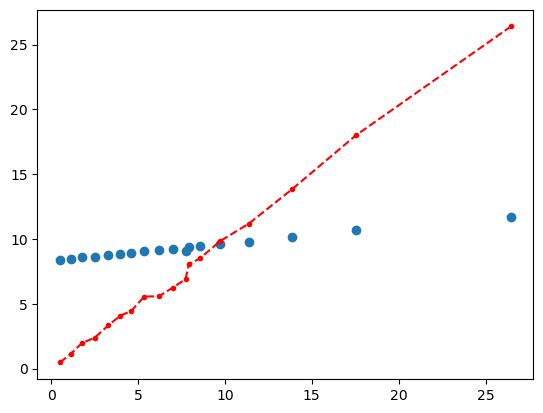

In [27]:
# Metodo de suavização lowess

import statsmodels.api as sm  # A função do Lowess está aqui
from scipy.interpolate import interp1d  # Vamos precisar dessa interpolação

# Define a suavização dos dados na variável lowess
lowess = sm.nonparametric.lowess(tab.media_tempo_emprego,
                                 tab.log_renda,
                                 frac=2 / 3)

# Valores de Y suavizados
lowess_y = lowess[:, 1]

# Gráfico
fig, ax = plt.subplots()

ax.plot(tab.media_tempo_emprego,
        tab.log_renda,
        "o",
        label="Dados observados",
        alpha=1)
ax.plot(tab.media_tempo_emprego, lowess_y, "r--.", label="Lowess")

# Valores de X suavizados
lowess_x = lowess[:, 0]

# Roda a interpolação do scipy
f = interp1d(lowess_x, lowess_y, bounds_error=False)

df_perfil['X1_lowess'] = f(df_perfil.media_tempo_emprego)

res_lowess = smf.ols('log_renda ~ X1_lowess', data=df_perfil).fit()

print(f'R-quadrado: {res_lowess.rsquared:.2%}')

res_lowess.summary()

In [28]:
#transformação do X

res_trans = smf.ols(' log_renda ~ I(np.log(media_tempo_emprego))',data=tab).fit()
print(f'R-quadrado: {res_trans.rsquared:.2%}')

res_trans.summary()

R-quadrado: 72.60%


C:\Users\sann_\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_renda   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     42.39
Date:                Wed, 03 May 2023   Prob (F-statistic):           7.18e-06
Time:                        13:39:19   Log-Likelihood:                -10.362
No. Observations:                  18   AIC:                             24.72
Df Residuals:                      16   BIC:                             26.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          8.0837      0.218     37.144      0.000       7.622       8.545
I(np.log(media_tempo_emprego))     0.7328      0.113      6.511      0.000       0.494       0.971
==============================================================================
Omnibus:                       12.500   Durbin-Watson:                   0.378
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                9.635
Skew:                           1.556   Prob(JB):                      0.00809
Kurtosis:                       4.778   Cond. No.                         4.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
# Regressão segmentada 

C1=20

tab['X1_1'] = (tab.media_tempo_emprego<=C1)*tab.media_tempo_emprego + (tab.media_tempo_emprego>C1)*C1
tab['X1_2'] = (tab.media_tempo_emprego<=C1)*0 + (tab.media_tempo_emprego>C1)*(tab.media_tempo_emprego-C1)

res_seg = smf.ols('log_renda ~ X1_1+ X1_2',data=tab).fit()

print(f'R-quadrado: {res_seg.rsquared:.2%}')

res_seg.summary()


R-quadrado: 99.34%


C:\Users\sann_\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_renda   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     1135.
Date:                Wed, 03 May 2023   Prob (F-statistic):           4.25e-17
Time:                        13:56:13   Log-Likelihood:                 23.225
No. Observations:                  18   AIC:                            -40.45
Df Residuals:                      15   BIC:                            -37.78
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.2995      0.032    262.225      0.000       8.232       8.367
X1_1           0.1312      0.004     33.293      0.000       0.123       0.140
X1_2           0.1251      0.014      8.812      0.000       0.095       0.155
==============================================================================
Omnibus:                       41.057   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.185
Skew:                          -3.354   Prob(JB):                     2.17e-26
Kurtosis:                      13.610   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Avaliando o modelo

Avalie os resultados dos modelos construidos na base de testes.

In [20]:
#criar dataframe de perfil de teste
df_perfil_teste = df_treino.copy()

#cria uma nova coluna contendo as categorias de tempo de emprego
df_perfil_teste['tempo_emprego_cat'] = pd.cut(df_perfil_teste['tempo_emprego'],
                                              quebras2)

# cria uma nova coluna contendo o número de observações para cada categoria
df_perfil_teste['num_obs'] = df_perfil_teste.groupby(
    'tempo_emprego_cat')['tempo_emprego_cat'].transform('count')

# cria uma nova coluna contendo o log de renda para cada categoria
df_perfil_teste['log_renda'] = np.log(df_perfil_teste['renda'])

# cria uma nova coluna contendo a média de tempo de emprego para cada categoria
df_perfil_teste['media_tempo_emprego'] = df_perfil_teste.groupby(
    'tempo_emprego_cat')['tempo_emprego'].transform('mean')

In [21]:
#diminuindo a dimenção do dataframe teste
tab_teste = pd.DataFrame()
tab_teste['media_tempo_emprego'] = df_perfil_teste.groupby(
    tempo_emprego_cat)['media_tempo_emprego'].mean()

tab_teste['log_renda'] = df_perfil_teste.groupby(
    tempo_emprego_cat)['log_renda'].mean()

In [33]:
# Avaliando os modelos de regressão com os dados de teste
from sklearn.metrics import r2_score
### Modelo de categorização.

y_pred = res_cat.predict(df_perfil_teste[['tempo_emprego_cat']])
r2_ajustado = r2_score(df_perfil_teste['log_renda'],
                       y_pred) * (1 - (len(quebras2) - 1) /
                                  (len(df_perfil_teste) - len(quebras2)))
print(f'R-quadrado ajustado: {r2_ajustado:.2%}')

R-quadrado ajustado: 37.53%


In [42]:
### Modelo de segmentação.
tab_teste['X1_1'] = (tab_teste.media_tempo_emprego<=C1)*tab_teste.media_tempo_emprego + (tab_teste.media_tempo_emprego>C1)*C1
tab_teste['X1_2'] = (tab_teste.media_tempo_emprego<=C1)*0 + (tab_teste.media_tempo_emprego>C1)*(tab_teste.media_tempo_emprego-C1)


y_pred = res_seg.predict(tab_teste[['X1_1','X1_2']])
r2_ajustado = r2_score(tab_teste['log_renda'],
                       y_pred) * (1 - (len(quebras2) - 1) /
                                  (len(tab_teste) - len(quebras2)))
print(f'R-quadrado ajustado: {r2_ajustado:.2%}')

R-quadrado ajustado: 65.25%


In [40]:
### Modelo de transformação de X.

y_pred = res_trans.predict(tab_teste[['media_tempo_emprego']])
r2_ajustado = r2_score(tab_teste['log_renda'],
                       y_pred) * (1 - (len(quebras2) - 1) /
                                  (len(tab_teste) - len(quebras2)))
print(f'R-quadrado ajustado: {r2_ajustado:.2%}')



R-quadrado ajustado: 50.59%


O modelo de seguementação teve o melhor resultado na base de teste com R-quadrado ajustado de 65,25%. O modelo de suavização de lowess não foi aplicado na base de teste pela baixa qualidade do modelo de suavização, que gerou um grande numero de erros.